<a href="https://colab.research.google.com/github/raeubaen/misc/blob/master/Bayesian_Cheating_Detection_(en).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[//]: # (This may be the most BayesiaCheating Detection vorrei spiegare bene il metodo col codice che c'è ora e poi scrivere un pacchetto python da mettere su pip con la classe per il metodo generico, che si può pubblicare su JSS)

#Bayesian Cheating Detection

## Introduction

Detecting cheating in tests, exams and games can be hard when many tasks or several participants are involved.
This job can be simplified if there is an advantage for participants who hand in their work before others.
Under these circumstances, considering as cheating only illicit communications between participants, it can be asserted that,
given a specific task, some cheating teams or individuals will hand in their work at times considerably close to each other.
Then by analyzing the distribution of times we can quantitatively infer, using a new technique called Bayesian Cheating Detection, if there has been a fraud.
This precise situation occurred in a 48-hour long treasure hunt held in 2019 in Sorrento (Italy) featuring seven teams and about thirty riddles to solve (given in different orders to different teams);
By analyzing data about the times when each team handed in the solution to each riddle, we were able to find two teams whose times were extremely similar for six consecutive riddles which were received in the same order. 
The resulting data can be used, with its related context, to explain the general method.
Despite its very specific origin, this technique can be applied in all mathematically equivalent situations such as exams, tests, other kinds of games and even in completely different 
fields, as instance when searching for time coincidence or other types of correlations between data from experiments, sensors, bank accounts and so on.

##Proposed technique

###General definitions and considerations

Let us consider a time-based game where $S$ teams have $N$ riddles $i_1,\, \dots, i_N$ to solve in different orders. We also assume to know the so-called solution times, when each team solved each riddle and almost simultaneously received the next one by the committee. Let $I_i^{(s, t)}$ be the event: *teams $s$ and $t$ collaborated (or one helped the other) during the solution of the $i$-th riddle*. Conversely, the $NI_i^{(s, t)}$ event states a non-collaboration. If a $I_k^{(s, t)}$ event occurred, we expect the difference in absolute solution times of the $k$-th riddle between teams $s$ and $t$ to be smaller with respect to the $NI_k^{(s, t)}$ case. This reasoning allows us to estimate the ratio between $I_k^{(s, t)}$ and $NI_k^{(s, t)}$ probabilities, conditioned to the observation from our data of absolute times $t^s_i$ and $t^t_i$ for riddles $i$ from $i_1$ to $i_N$. This ratio is the Bayes Factor of the $I_k^{(s, t)}$ hypothesis with respect to the $NI_k^{(s, t)}$ one, inferred on the basis of the collected data. 

### Likelihood definition

Let $P(D | I^{(s, t)}_{i_a} \dots I^{(s, t)}_{i_b})$ and $P(D | NI^{(s, t)}_{i_a} \dots NI^{(s, t)}_{i_b})$ be the probabilities to observe our data $D$, assuming a collaboration between teams $s$ and $t$ during riddles ranging from $i_a$ to $i_b$ (or the complement).
We obviously suppose that both teams received riddles between $i_a$ and $i_b$ in the same order. 

### Modelling the time distributions

If the teams did not collaborate, we could assume that the time differences are normally distributed, with mean $\mu$ and st. dev. $\sigma$, inferred from all riddles; the normality of data in its whole is checked by a Kolmogorov-Smirnov test. Then: 
$$P(D | NI^{(s, t)}_{i_a} \dots NI^{(s, t)}_{i_b}) = p(\mathbf{X} \mid \mu,\,\sigma )=\prod\limits_{i=1}^{n}\sqrt{\frac 
{1 }{2\pi \sigma^2}}\exp\left[-\frac{1}{2 \sigma^2} (x_{i}-\mu
)^{2}\right]\\=\left(\frac{1}{2\pi \sigma^2} \right)^{n/2}\exp
\left[-{\frac{1}{2\sigma^2}} \sum_{i=1}^{n}(x_{i}-\mu
)^{2}\right]$$ with $\pmb{\Delta T}^{(s, t)}_i \sim \mathrm{Norm}(\mu, \sigma) \quad \forall i$.<br>
If the teams did collaborate, we could assume that the same hypotheses as before, but substituting $\mu = \mu_C, \sigma = \sigma_C$; the parameters $\mu_C$ and $\sigma_C$ must be chosen depending on the way the teams can collaborate and hand in their work. For example, in our treasure hunt, the teams, after solving a riddle, have to reach the place spacified by the solution record a video explaining the reasoning; after this, they also have to wait that some team-mates queue up outside the seat of the commitee to present the work done. Hence, we assumed $\mu_C = 0, \, \sigma = 5\, \mathrm{min}$, considering the two teams roughly equally fast. 

These choices obviously depend strongly on the considered situation; they are optimal for our treasure hunt, but might be generalized for other kinds of exams, games, and so on. We believe that the method is robust enough to deal with other reasonable choices  of distributions.

### Bayesian step

We assume, before doing inferences, the ratio between a-priori probability of collaborating and not-collaborating to be $p$. In the case of total ignorance, it is usually taken $p=1$. Given that we believe that a collaboration is improbable (we are optimistic), we assume $p=0.1 = 10\%$. The final likelihood ratio is:
$$ \mathrm{LR} = \frac{P(D | I^{(s, t)}_{i_a} \dots I^{(s, t)}_{i_b})}{P(D | NI^{(s, t)}_{i_a} \dots NI^{(s, t)}_{i_b})}$$ and the resulting bayes factor:
$$bf = \frac{P(I^{(s, t)}_{i_a} \dots I^{(s, t)}_{i_b} | D)}{P(NI^{(s, t)}_{i_a} \dots NI^{(s, t)}_{i_b} | D)} = \frac{P(D | I^{(s, t)}_{i_a} \dots I^{(s, t)}_{i_b}) P(I^{(s, t)}_{i_a} \dots I^{(s, t)}_{i_b} )}{P(D | NI^{(s, t)}_{i_a} \dots NI^{(s, t)}_{i_b}) P(NI^{(s, t)}_{i_a} \dots NI^{(s, t)}_{i_b} )} = \mathrm{LR} \cdot p$$

With our data, considering the teams `skuato` and `corsari` from their 24th to 29th riddle, we obtain an $\mathrm{LR}$ of 3000 and then a Bayes factor of 300, that is above the commonly considered threshold of 100.

Let us begin with a scatter plot of solution times.

In [1]:
# downloading data
!wget -q -N https://github.com/raeubaen/ml/raw/master/excel.zip 
!yes | unzip excel.zip > \dev\null 2>&1

In [2]:
# Importing external modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import itertools
from scipy import stats

# Graphics settings
plt.style.use('ggplot')
plt.rcParams['axes.facecolor'] = '#f7f9fc'

# Suppress warnings
# should run only when the program has already been tested
import warnings
#warnings.filterwarnings("ignore")

In [3]:
###---------------------------------
# Parsing excel files
path = os.getcwd()
files = os.listdir(path)

excel_files = [
  f for f in files 
  if f[-4:] == 'xlsx' and f[:3]!="hsl"
]
team_num = len(excel_files)

# Dictionary with teams as keys 
# and their Dataframes (containing minutes read from excel) as values
dfs = {
  f[:-5]: pd.read_excel(f, usecols=[
    "nome indizio", "minuti da inizio", "minuti impiegati",
  ])
  for f in excel_files
}

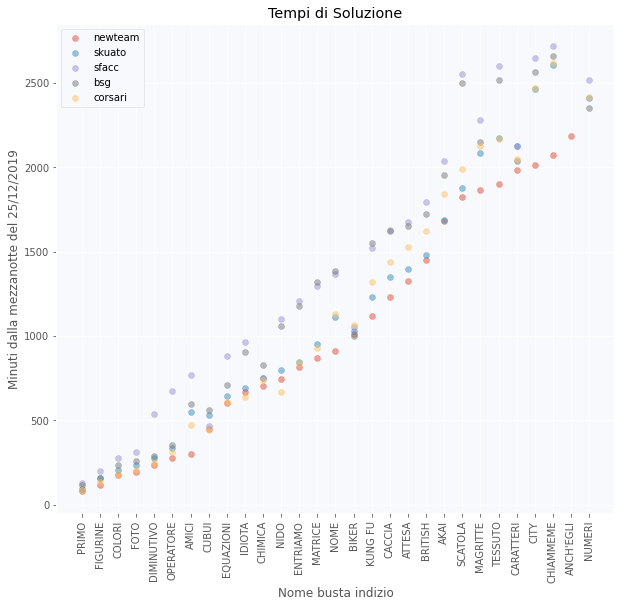

In [4]:
###--------------------------------------------
# Plotting minfromstart on (y) and riddle names on (x) for each team
missing = ["MIAO", "FINALCOUNTDOWN", "PASSEGGIATA"] # riddles not solved by all teams analyzed

fig, ax = plt.subplots(figsize=(10, 10))
for f, df in dfs.items():
  # renaming columns in
  #   -riddle: riddle titles,
  #   -mins:    minutes from start,
  #      referred to the moments when the teams received the riddles (m1, ...)
  #   -dmin:   minutes taken to solve riddles (m2-m1, ...)
  df.rename(columns={
    'nome indizio':     'riddle',
    'minuti da inizio': 'mins',
    'minuti impiegati': 'dmin',
  }, inplace=True)
  # dropping rows with nan values 
  df.dropna(inplace=True)
  # excluding riddles in the missing list
  for m in missing:
    df = df[df.riddle != m] 
  # sorting by mins
  df.sort_values(by=['mins'], inplace=True)
  # copying the index into a column to number riddles 
  df['num'] = df.index
  # re-assigning to the dictionary
  dfs[f] = df
  ## scatter plot
  # slicing to get times when teams solved
  ax.scatter(
    df.riddle.to_numpy()[:-1], df.mins.to_numpy()[1:],
    label=f, alpha=0.5
  )

plt.xticks(rotation=90)
plt.legend()
ax.set(xlabel="Nome busta indizio", ylabel="Minuti dalla mezzanotte del 25/12/2019",)
fig.subplots_adjust(bottom=0.2)
plt.title("Tempi di Soluzione")
plt.savefig("times.pdf")
plt.show() #blocking
plt.close()

It is already clear from the figure that the two teams are considerably close each other in the last part of the competition.

Let us construct the gaussian model for the differences in solution times, by evaluating means and standard deviations. The goodness of the model will be checked via a Kolmogorov-Smirnov normality test.

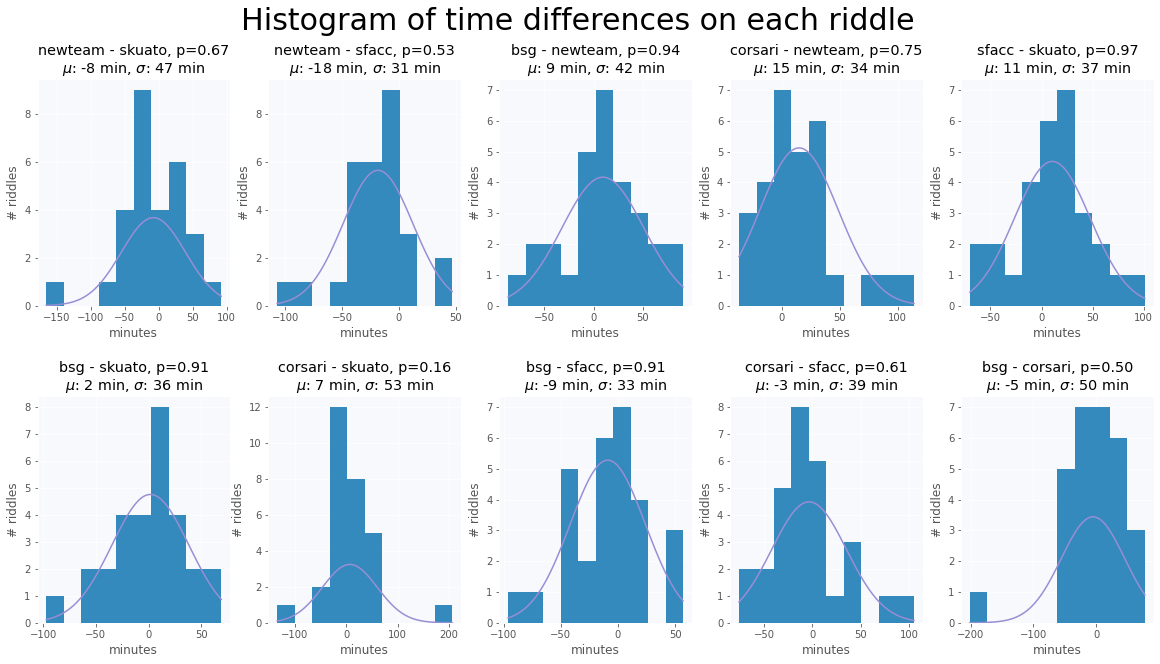

In [5]:
###---------------------------------------------------------
# Constructing a gaussian model for the differences between all pairs of teams 
# in the time taken to solve each riddle 

# ordering by riddle name 
for f, df in dfs.items():
  df.sort_values(by=['riddle'], inplace=True) 
  dfs[f] = df.reset_index(drop=True)

##----------------------------------------------------------
# Calculating, saving in $diff and plotting averages and st. devs 


def shape_and_size(pairs = 5):
    a = int(np.sqrt(pairs))
    while pairs%a > 0: a -= 1
    return (a, pairs//a), (4*pairs//a, 5*a)

axs_shape, figsize = shape_and_size(pairs=team_num*(team_num-1)//2)
fig, axs = plt.subplots(*axs_shape, figsize=figsize)

# DataFrame to store mu and sigma values for time differences
gauss = pd.DataFrame(columns=["label", "team0", "team1", "mu", "sigma"])

i = 0
# iterating over all couples of teams
for pair in itertools.combinations(dfs.keys(), 2): 
  pair = sorted(pair) # to define an order

  label = pair[0] + " - " + pair[1]
  time_diff = dfs[pair[0]].dmin - dfs[pair[1]].dmin

  mu = np.mean(time_diff)
  sigma = np.std(time_diff)

  #---------------------------------------------------------
  # Plotting histograms of time difference between teams
  # Testing for normality via Kolmogorov-Smirnov (KS) test
  # KS-test p-value - displayed in the histograms
  pvalue = stats.kstest((time_diff - mu)/sigma, 'norm').pvalue 

  minimum = np.min(time_diff)
  maximum = np.max(time_diff)
  x = np.linspace(minimum, maximum, 100)
  binwidth = 15
  bins=np.arange(minimum, maximum + binwidth, binwidth)

  axs[i//5, i%5].hist(time_diff)
  axs[i//5, i%5].hist(time_diff)
  # overlapping the gaussian pdf curve to the histogram
  axs[i//5, i%5].plot(x, len(time_diff)*binwidth*stats.norm.pdf(x, mu, sigma))

  axs[i//5, i%5].set(
    title=f"{label}, p={pvalue:.2f}\n$\mu$: {mu:.0f} min, $\sigma$: {sigma:.0f} min", 
    xlabel="minutes", ylabel="# riddles",
  )

  i += 1

  # saving mu and sigma in the Dataframe
  gauss = gauss.append({
    "label": label, "team0": pair[0], "team1": pair[1],
     "mu": mu, "sigma": sigma,
  }, ignore_index=True)

fig.suptitle(
  'Histogram of time differences on each riddle', 
  fontsize=30
)
fig.subplots_adjust(hspace=0.4)
plt.savefig("hist.pdf")
plt.show()
plt.close()

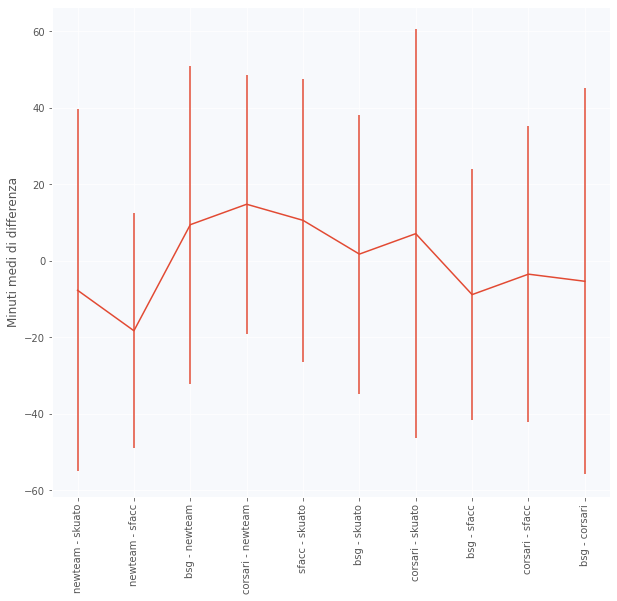

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.errorbar(gauss.label, gauss.mu, yerr=gauss.sigma)
plt.xticks(rotation=90)
ax.set(ylabel="Minuti medi di differenza")
fig.subplots_adjust(bottom=0.2)
plt.savefig("diff.pdf")
plt.show() #blocking
plt.close()

Let us estimate the bayes factors for all the pairs of teams and for all possible values of $i_1$ e $i_2$.

First of all, for every pairs of teams, we find the riddles solved less than $b$ minutes apart (a good value may be $b=30$).
Then, among those, we evaluate the Bayes factor only for the sequences of riddles solved in the same order.

Finally, we will plot a summary graph containing an heatmap of Bayes factors for each couple of teams and for all possible riddle intervals(non-analyzed riddles are shown in grey).

In [8]:
riddle_tot = 30 # number of riddles
###------------------------------------------------------------------
## Evaluate bayes factors on a single chunck of consecutive riddles
def bayes_factor_one_chunck(
  df0, df1, gauss=gauss,
  pair=None, riddle_tot=30
):
  # df0 and df1 only contain suspected riddles

  pair = sorted(pair)
  label = pair[0] + " - " + pair[1]

  time_diff = df0.mins.to_numpy() - df1.mins.to_numpy()

  n_riddles = len(time_diff)
  riddles = np.arange(n_riddles)
  r1, r2 = np.meshgrid(riddles, riddles)
  # we must impose always r2 > r1
  ind = np.triu_indices(n_riddles) # upper triangolar matrix indices
  r1, r2 = r1[ind], r2[ind]

  # max_diff will contain the maxima within all possible intervals,
  #   as an upper triangular matrix - created empty, to be filled later
  lhood_no_fraud = np.empty((n_riddles, n_riddles)) * np.nan
  lhood_fraud = np.empty((n_riddles, n_riddles)) * np.nan

  # reductions contains (as couples in a list) 
  # all possible pairs of interval limits (r2 > r1)
  # i.e. 0, 1, 0, 2, 0, 3, ..., 1, 2, ..., 2, 3, ....
  reductions = np.column_stack((r2, r1+1)).ravel()

  # extracting mu and sigma from the Dataframe
  df = gauss[gauss.label==label]
  m, s = df.mu.iloc[0], df.sigma.iloc[0]

  # cumulative density functions
  # np.ufunc.reduceat applys one ufunc (e.g. add, max, min, multiply, ...)
  # to the slices of an array; the slicings are defined by couples of indices 
  # in a list formatted as $reductions

  lhood_no_fraud[ind] = np.multiply.reduceat(
    np.append(stats.norm.pdf(time_diff, m, s), 0), 
    reductions,
  )[: : 2]
  
  mu_c, sigma_c = 0, 5
  lhood_fraud[ind] = np.multiply.reduceat(
    np.append(stats.norm.pdf(time_diff, mu_c, sigma_c), 0), reductions
  )[: : 2]

  bf = lhood_fraud / lhood_no_fraud

  ret = np.empty((riddle_tot, riddle_tot)) * np.nan
  # extract first and last riddle numbers
  fr, lr = df0.num.min(), df0.num.max()+1 # numbering following the 1st team 

  ret[fr:lr, fr:lr] = bf

  return ret

In [9]:
def add_ignore_nans(a, b):
  stacked = np.array([a, b])
  res = np.nansum(stacked, axis=0)
  res[np.all(np.isnan(stacked), axis=0)] = np.nan
  return res

In [10]:
def consecutive_chunks(df0, df1):
  df0 = df0.sort_values(["num"])
  df0 = df0.set_index('num')
  df0 = df0.reset_index()

  df1 = df1.set_index('riddle')
  df1 = df1.reindex(index=df0['riddle'])
  df1 = df1.reset_index()

  df_tot = pd.concat([df0, df1])
  df_tot.sort_index(inplace=True)
  df_tot.reset_index(inplace=True)

  s = np.arange(0, len(df0), 0.5).astype("int") # 0, 0, 1, 1, 2, 2, ...

  # returns list of series of consecutives riddles
  consec_chunks = [
    df.drop_duplicates() for df in [ 
      d[d.duplicated('riddle') | d.duplicated('riddle', keep='last')].riddle 
        for _, d in df_tot.groupby(df_tot.sort_index().num - s)
    ]
    if len(df) > 2
  ]
  return consec_chunks

In [13]:
threshold = 30 # maximum time difference allowed in case of fraud

def bayes_factor_all(dfs, pair):
  df0, df1 = dfs[pair[0]], dfs[pair[1]]
  riddle_tot = len(df0) + 1

  ind = (df0.mins - df1.mins).abs() < threshold
  df0, df1 = df0[ind], df1[ind]
  
  consec_chunks = consecutive_chunks(df0, df1)

  bf_mat = np.empty((riddle_tot, riddle_tot))*np.nan
  for chk in consec_chunks:
    temp1 = df0.merge(chk, on=['riddle'], how='inner')
    temp2 = df1.merge(chk, on=['riddle'], how='inner')
    bf_mat = add_ignore_nans(
      bf_mat, bayes_factor_one_chunck(
        temp1, temp2,
        pair = pair, riddle_tot = riddle_tot,
      )
    )
  return bf_mat

At this preliminary stage, to select suspicious cases, we will clip all factors at 1000, to fix a unique scale for all graphs.

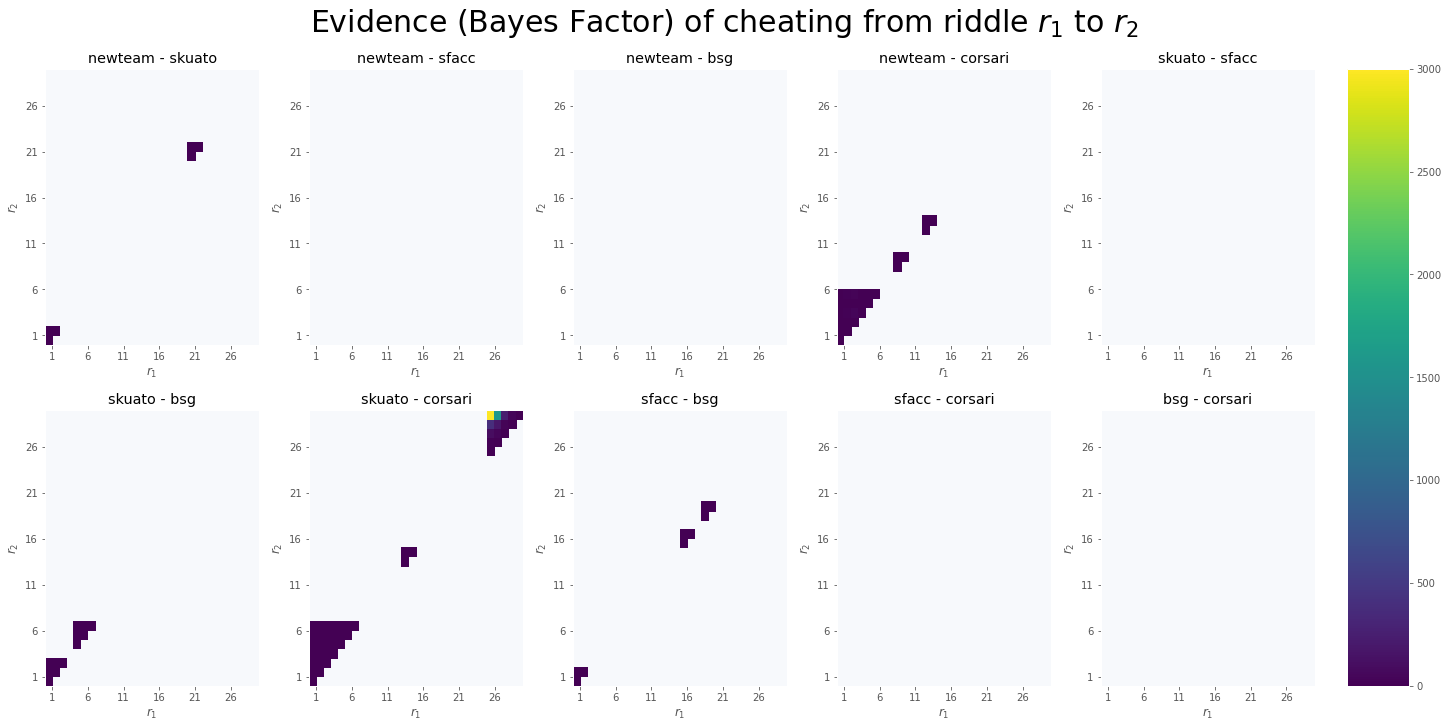

CPU times: user 3.7 s, sys: 467 ms, total: 4.16 s
Wall time: 3.69 s


In [14]:
%%time
start, end = 1, 29
ticks = np.arange(start, end+1, 5)
fig, axs = plt.subplots(*axs_shape, figsize=figsize, constrained_layout=True)
i = 0
# iterating over all couples of teams
for pair in itertools.combinations(dfs.keys(), 2):
  ax = axs[i//5, i%5]
  bf_mat = bayes_factor_all(dfs, pair)
  im = ax.pcolormesh(bf_mat.T, vmin=0, vmax=3000) #normalizing on the threshold
  ax.set(
    xticks=ticks, yticks=ticks, 
    xlabel="$r_1$", ylabel="$r_2$", 
    title = pair[0] + " - " + pair[1]
  )
  i += 1

fig.suptitle("Evidence (Bayes Factor) of cheating from riddle $r_1$ to $r_2$", fontsize=30)
plt.savefig(f"bayes.pdf")
fig.colorbar(im, ax=axs.ravel().tolist())
plt.show()
plt.close()

As shown in figure, the only signal strong enough to be considered significant refers to `corsari` and `skuato`, between the 24th and the 29th riddle. 
We then replot only the graph that refers to them, without clipping the data.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in multiply


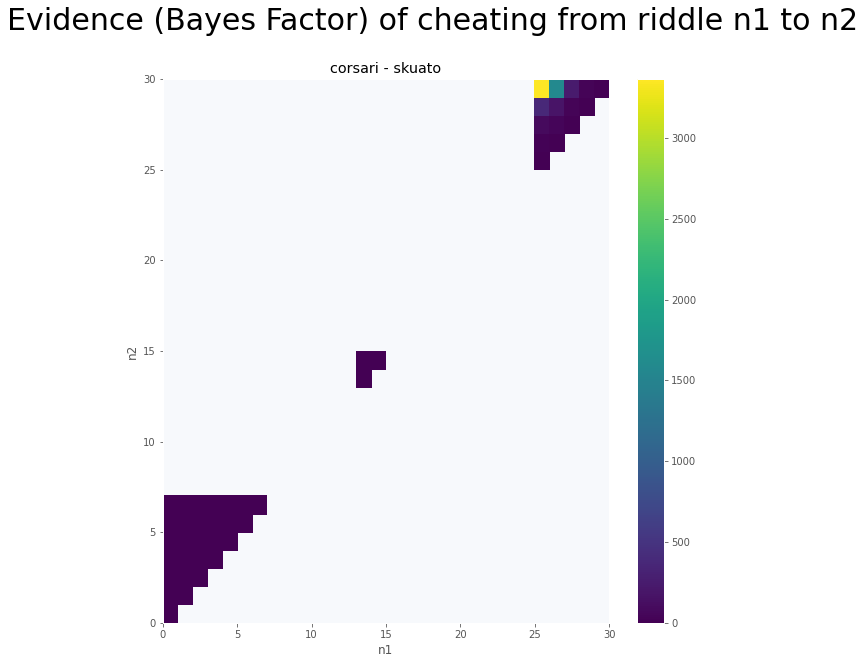

In [15]:
pair = ["corsari", "skuato"]
fig, ax = plt.subplots(figsize=(10, 10))

bf_mat = bayes_factor_all(dfs, pair)
im = ax.pcolormesh(bf_mat.T)

ax.set(xlabel="n1", ylabel="n2", title = pair[0] + " - " + pair[1])
fig.suptitle("Evidence (Bayes Factor) of cheating from riddle n1 to n2", fontsize=30)
fig.colorbar(im)
plt.savefig(f"bayes-corsari-skuato.pdf")
plt.show()
plt.close()